1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [41]:
from matplotlib import pyplot as plt
from scipy import linalg as la
import numpy.random as npr
import numpy as np


# construct a dataset with a skewed 3D distribution
mu = 0  
sigma1 = 1
sigma2 = 3 
n = 1000


x1 = npr.normal(loc=mu, scale=sigma1, size=n)
x2 = x1 + npr.normal(mu, sigma2, n)
x3 = 2*x1 + x2


#Un dataset creato in questo modo crea una matrice (3,N) dove le righe sono x1,x2,x3
data = np.array([x1,x2,x3])


#Compute the covariance matrix
cov = np.cov(data)

#Find eigenvectors and eigenvalues of a matrix
l, V = la.eigh(cov)
ind = np.argsort(l)[::-1]
l = l[ind]
V = V[:, ind]
for i in range (3):
    print("Eigenvalue: ", l[i])
    print("Eigenvector: ", V[:,i],"\n")

#Eigenvalues and Eigenvactors using SVD
print("SVD \n")
# Compute the SVD of data
U, s, V2 = la.svd(data)

# The eigenvectors of data(dataT)=cov(data) are the columns of the matrix U
eigenvectors = U

# The eigenvalues of data(dataT)=cov(data) are the squares of the singular values s, the mapping with N-1 rescaling is necessary
eigenvalues = np.square(s)/(n-1)

for i in range (3):
    print("Eigenvalue: ", eigenvalues[i])
    print("Eigenvector: ", eigenvectors[:,i],"\n")

# The results are very similar but no identical 
print("Result comparison:")
print("Eigenvalues:\n", np.allclose(l, eigenvalues**2/(n-1), 1e-3))
print("Eigenvectors:\n", np.allclose(V, eigenvectors, 1e-3))






[[ 0.38328259 -0.34433695  1.27481331 ...  0.23850345  0.64794821
   1.4373668 ]
 [-2.01347016 -1.96745622 -1.28834642 ... -2.08926272  3.03039343
  -3.10755724]
 [-1.24690498 -2.65613013  1.26128019 ... -1.61225583  4.32628985
  -0.23282365]]
Eigenvalue:  27.149473631920273
Eigenvector:  [0.11521414 0.57767008 0.80809837] 

Eigenvalue:  1.9388226831974453
Eigenvector:  [ 0.5657376  -0.70684553  0.42462967] 

Eigenvalue:  -2.6896386161961055e-16
Eigenvector:  [ 0.81649658  0.40824829 -0.40824829] 

SVD 

Eigenvalue:  27.154744174851654
Eigenvector:  [-0.11513513 -0.5777688  -0.80803906] 

Eigenvalue:  1.941175062017533
Eigenvector:  [ 0.56575369 -0.70676485  0.42474253] 

Eigenvalue:  1.4497399311637549e-31
Eigenvector:  [-0.81649658 -0.40824829  0.40824829] 

Result comparison:
Eigenvalues:
 False
Eigenvectors:
 False


Lambda.trace(): 29.821466115141803
PCA w k=1 (0): 0.9290786107811585 of the total variability conserved
PCA w k=1 (1): 0.07092138921884145 of the total variability conserved
PCA w k=1 (2): -3.522004645304337e-17 of the total variability conserved
PCA w k=2 (0,1): 1.0 of the total variability conserved


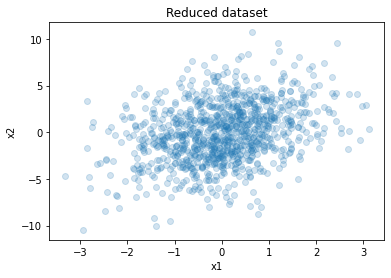

In [31]:
#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? 
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

Lambda=np.diag(np.real_if_close(l))
print ("Lambda.trace():", Lambda.trace())

print ("PCA w k=1 (0):",Lambda[0,0]/Lambda.trace(), "of the total variability conserved")
print ("PCA w k=1 (1):",Lambda[1,1]/Lambda.trace(), "of the total variability conserved")
print ("PCA w k=1 (2):",Lambda[2,2]/Lambda.trace(), "of the total variability conserved")

#We find that the first two retain more than the 99% of the total variability.
#It makes sense since the dataset have been built with two independent components

print ("PCA w k=2 (0,1):",abs(Lambda[0,0]+Lambda[1,1])/Lambda.trace(), "of the total variability conserved")

# Reduce the dimensionality of the system so that at least 99%of the total variability is retained.
data_reduced = data[:-1,:]
plt.scatter(data_reduced[0], data_reduced[1], alpha=0.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Reduced dataset")
plt.show()


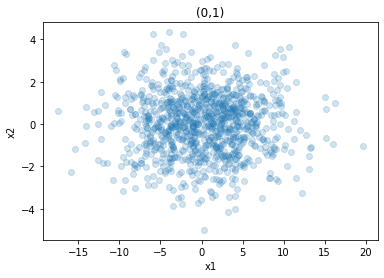

In [34]:
#Redefine the data in the basis yielded by the PCA procedure

data2 = np.dot(V.T, data)



#(0,1) projection
plt.scatter(data2[0,:], data2[1,:], alpha=0.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("(0,1)")
plt.show()



Text(0.5, 1.0, '(1,2)')

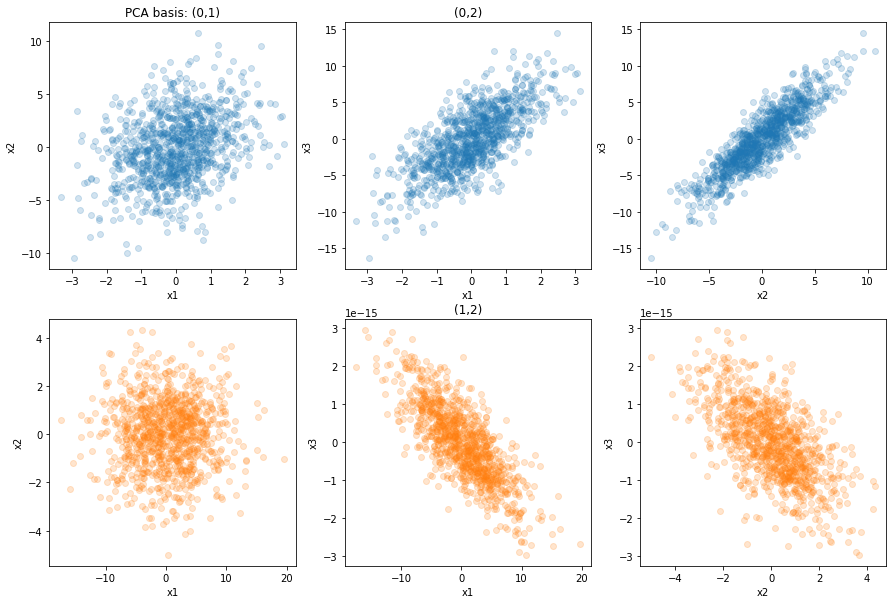

In [36]:
#Plot the data points in the original and the new coordiantes as a set of scatter plots. 
#Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

ax1.scatter(data[0,:], data[1,:], alpha=0.2)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Original basis: (0,1)")

ax2.set_title("(0,2)")
ax2.scatter(data[0,:], data[2,:], alpha=0.2)
ax2.set_xlabel("x1")
ax2.set_ylabel("x3")

ax3.scatter(data[1,:], data[2,:], alpha=0.2)
ax3.set_xlabel("x2")
ax3.set_ylabel("x3")

ax4.scatter(data2[0,:], data2[1,:], alpha=0.2, c = "tab:orange")
ax4.set_xlabel("x1")
ax4.set_ylabel("x2")
ax1.set_title("PCA basis: (0,1)")

ax5.scatter(data2[0,:], data2[2,:], alpha=0.2, c = "tab:orange")
ax5.set_xlabel("x1")
ax5.set_ylabel("x3")
ax5.set_title("(0,2)")

ax6.scatter(data2[1,:], data2[2,:], alpha=0.2, c = "tab:orange")
ax6.set_xlabel("x2")
ax6.set_ylabel("x3")
ax5.set_title("(1,2)")

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


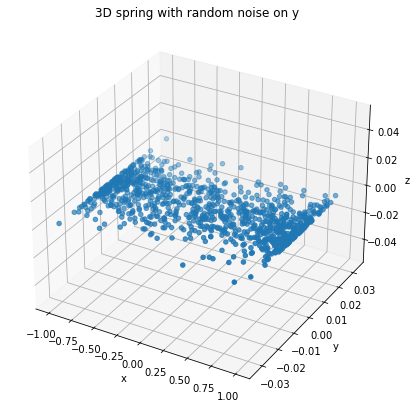

In [37]:
N  = 1000
t0 = 0
dt = 0.1

#Osiclation described by x=cos(wt+f) where w=1 and f=0

x = [np.cos(t0+dt*i) for i in range(1000)]

# assume little randome noise for y measurements
y = np.random.normal(0, 0.01, N)

z = np.zeros(N)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.set_title("3D spring with random noise on y")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

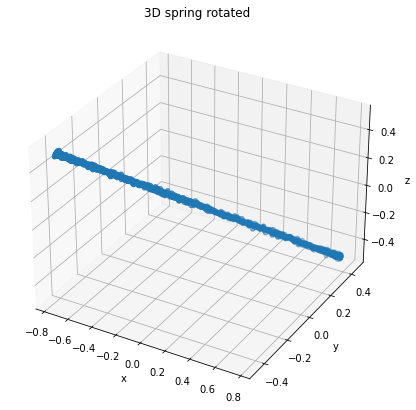

In [38]:
#Defines a function which apply rotations along y and z axis

def camera(phi, theta):
    rot_z = np.array([[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0], [0, 0, 1]])
    rot_y = np.array([[np.cos(theta), 0, np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]])
    return rot_z.dot(rot_y)

# check rotation (this part is optional) simulate a rotation of angles pi/6 for both theta and phi
rot = camera(np.pi/6, np.pi/6).dot(np.array([x, y, z]))
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(rot[0], rot[1], rot[2])
ax.set_title("3D spring rotated")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [42]:
# create the dataset
original_positions = np.array([x, y, z])

#Number of cameras
n = 6

#Def of phi and theta
theta = np.random.uniform(0, np.pi, n)
phi   = np.random.uniform(0, 2*np.pi, n)



#Il dataset creato in questo modo avrà a seguente struttura (x,y,z,x2,y2,z2,...,.xn,yn,zn)
views = []
for p, t in zip(phi, theta):
    views.append(camera(p, t).dot(original_positions))
full_dataset = [x, y, z]
for v in views:
    for i in range(3):
        full_dataset.append(v[i])
full_dataset = np.array(full_dataset)


In [43]:
#PCA procedure
covM = np.cov(full_dataset)
l, V = la.eig(covM)

#Here we notice that the first principal component (0,0 in the matrix) is alone above 99%. In fact x is the only coordinate that matters
Lambda=np.diag(np.real_if_close(l))
print(np.real_if_close(l)/np.trace(Lambda))

#Sono 21 componenti principali ovviamente..

[ 9.99798741e-01  2.01259410e-04 -1.29881492e-16  7.98710852e-17
 -7.47559653e-17 -5.36143595e-17 -5.36143595e-17  5.51080911e-17
  3.08177086e-17  2.79902754e-17  1.98797132e-17 -2.04119121e-17
 -1.31192529e-17 -6.97167156e-18  5.07321196e-18  2.98775517e-18
  2.98775517e-18  2.68445724e-19  3.26081832e-20 -5.19373830e-21
  0.00000000e+00]


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 